In [37]:
%pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 300

In [39]:
from glob import glob
all_network_files = glob("../results/network_stress**")

In [40]:
data = {}

for network_file in all_network_files:
    parts = network_file.split("_")
    client_count = int(parts[-1].split(".")[0])
    assert (client_count == 5 or client_count == 10 or client_count == 20 or client_count == 50 or client_count == 100)
    
    with open(network_file, 'r') as f:
        s = f.read();
        s = s.split("\n")[3:]
        s = [int(a.split("/")[0]) for a in s if a != ""]
        average_throughput = sum(s) / len(s)

        if client_count not in data:
            data[client_count] = []

        data[client_count].append(average_throughput)

In [ ]:
for k,v in data.items():
    data[k] = sum(v) / len(v)

data

{50: 125.13368421052634,
 100: 62.43120467836255,
 10: 572.0036842105262,
 20: 318.8105263157895,
 5: 1020.8631578947368}

Text(0.5, 1.0, 'Request Throughput vs. Connected Clients')

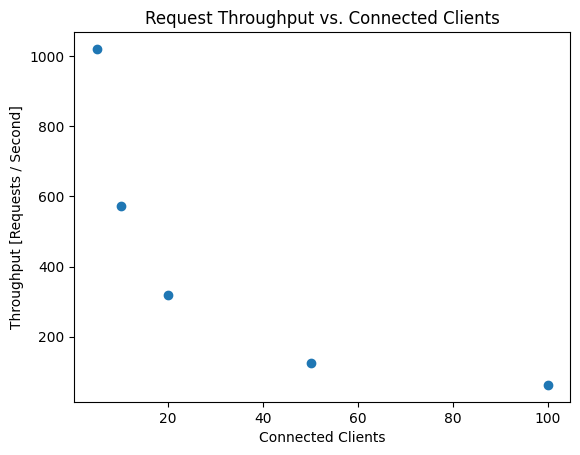

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data.keys(), data.values())
plt.xlabel("Connected Clients")
plt.ylabel("Throughput [Requests / Second]")
plt.title("Request Throughput vs. Connected Clients")

In [ ]:
for k,v in data.items():
    data[k] = 10_000 / v

data

{50: 79.9145335094257,
 100: 160.17631009234404,
 10: 17.482404879615242,
 20: 31.36659292765873,
 5: 9.795632179167269}

Text(0.5, 1.0, 'Time ot complete 10k requests vs. Connected Clients')

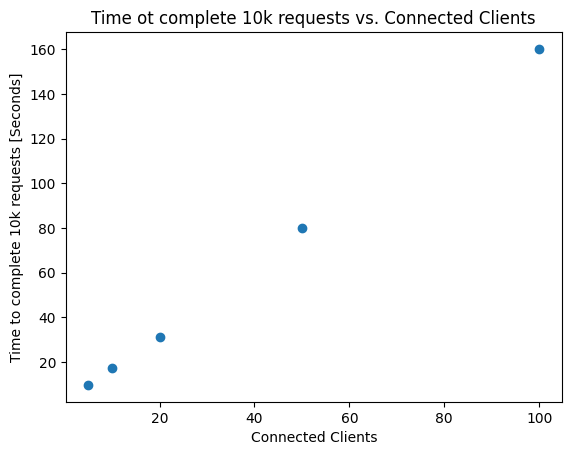

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data.keys(), data.values())
plt.xlabel("Connected Clients")
plt.ylabel("Time to complete 10k requests [Seconds]")
plt.title("Time ot complete 10k requests vs. Connected Clients")